In [1]:
import os
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")
dir_ = "C:\\Users\\mqayum2\\Box\\Spring 2024\\Data Science\\Data Science Final Project"
os.chdir(dir_)

os.getcwd()
%run 23_Sentiment_Analysis.ipynb

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mqayum2\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mqayum2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
X = StandardScaler().fit_transform(drug_2.iloc[:, :-1])

y = StandardScaler().fit_transform(drug_2[['sentiment']])

model = Lasso(alpha=.1)
model = model.fit(X=X,y=y)


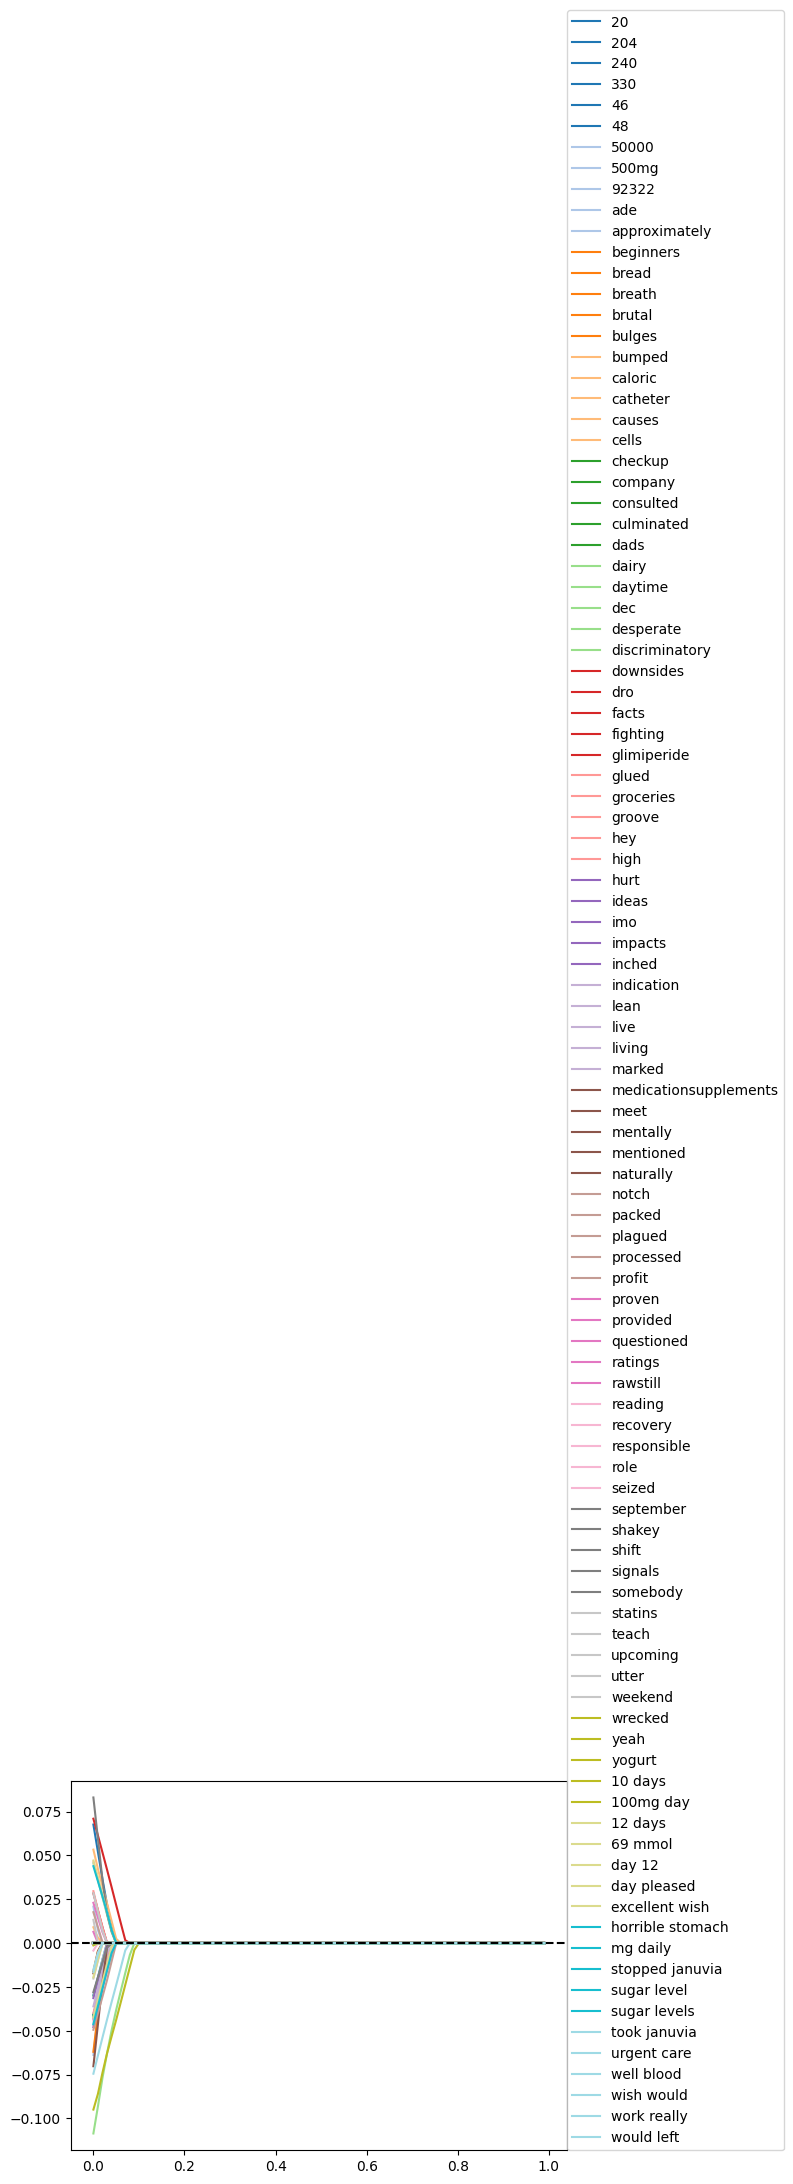

In [3]:
initial_words = list(drug_2[words].loc[:,model.coef_!=0].columns)
# Get a list of all of the coefficients which are themselves a list for every value of the grid
Alpha = np.arange(0,1,.01)
out = [list(get_coefs(a,initial_words,['sentiment'])) for a in Alpha]

OUT = pd.DataFrame(out).iloc[:, :len(initial_words)]
OUT.columns = initial_words
OUT.index = Alpha

                            #  word labels         alpha vals
# Plot it over alpha
OUT.plot(cmap="tab20") # this colormap is easier to see
plt.axhline(0,color='black',ls="--") # origin line
plt.legend(loc=(1,0)) # get the legend out of the way

In [4]:
Alpha = np.arange(0,.05,.01)
# Fitting the LassoCV model with 10-fold cross validation
lasso_model = LassoCV(alphas=Alpha,cv=10)

# Fit the data
lasso_model = lasso_model.fit(X=X,y=y)

In [5]:
lasso_model.alpha_

0.01

In [6]:
final_words_drug_2 = list(data[words].loc[:,lasso_model.coef_!=0].columns)

In [7]:
final_coefs = pd.DataFrame([words,lasso_model.coef_]).T

final_coefs = final_coefs.set_index(0)

final_coefs = final_coefs[final_coefs[1]!=0]

import numpy as np
final_coefs["abs_"] = np.abs(final_coefs[1])
final_coefs.sort_values(by='abs_', ascending=False)

,1,abs_
0,,
helps,0.193663,0.193663
run,0.180599,0.180599
pain,-0.166419,0.166419
NaN,0.15783,0.15783
least,0.153753,0.153753
...,...,...
though eating,-0.0,0.0
whatsoever,0.0,0.0
free,0.0,0.0


In [8]:
final_words_drug_2

['05mg',
 '113',
 '14mg',
 '152240',
 '16w',
 '20',
 '200350',
 '2011',
 '204',
 '213lbs',
 '233',
 '239',
 '240',
 '247',
 '25',
 '32',
 '330',
 '34lbs',
 '42lbs',
 '44',
 '46',
 '48',
 '49',
 '50000',
 '500mg',
 '62',
 '88',
 '92322',
 'acknowledged',
 'ade',
 'alcohol',
 'already',
 'approximately',
 'attack',
 'attempt',
 'average',
 'awful',
 'basaglar',
 'begin',
 'beginners',
 'beneath',
 'beverages',
 'biketreadmill',
 'biketreadmill',
 'bleeds',
 'bread',
 'breath',
 'brutal',
 'buds',
 'bulges',
 'bundle',
 'byetta',
 'caloric',
 'cardiologist',
 'catheter',
 'causes',
 'cells',
 'checkup',
 'chemical',
 'commercial',
 'company',
 'consulted',
 'cost',
 'counteract',
 'creep',
 'cruciferous',
 'culminated',
 'curbs',
 'dads',
 'dairy',
 'daytime',
 'dec',
 'decreased',
 'desperate',
 'discriminatory',
 'diving',
 'diving',
 'doctorhe',
 'downsides',
 'drastically',
 'dro',
 'endocrinologists',
 'excessively',
 'exercising',
 'explosive',
 'facts',
 'fatigue',
 'fighting',
 'f

## Most Postive Words

In [9]:
postive_words = final_coefs[final_coefs[1]>.015].sort_values(by=1, ascending=False)

In [10]:
positive_words = postive_words.index

In [11]:
len(positive_words)

50

## Most Negative Words

In [12]:
negative_words = final_coefs[final_coefs[1]<-0.015].sort_values(by=1, ascending=True)

In [13]:
negative_words = negative_words.index

In [14]:
len(negative_words)

41